# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jessicarosedecunhacarmichael/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv("jess.env")
api_key = "a8002373511249d28bf4240002c343b1"

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)   

In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)   

In [9]:
bitcoin_df.describe()

,compound,negative,neutral,positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.082863,0.019543,0.939138,0.041330
std,0.317167,0.039270,0.076196,0.062456
min,-0.612400,0.000000,0.675000,0.000000
25%,0.000000,0.000000,0.900250,0.000000
50%,0.000000,0.000000,0.958000,0.000000
75%,0.323300,0.000000,1.000000,0.072000
max,0.817300,0.176000,1.000000,0.233000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,86.000000,86.000000,86.000000,86.000000
mean,0.161636,0.020721,0.919419,0.059872
std,0.347829,0.041619,0.084913,0.071674
min,-0.700300,0.000000,0.688000,0.000000
25%,0.000000,0.000000,0.865250,0.000000
50%,0.000000,0.000000,0.935500,0.038000
75%,0.440400,0.028500,1.000000,0.105500
max,0.839900,0.189000,1.000000,0.263000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score by 0.018053

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
sw = stopwords.words('english')

In [13]:
def tokenizer(text):
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)  
    # Remove the stopwords
    words = word_tokenize(re_clean)   
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]   
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [14]:
# Create a new tokens column for Bitcoin
nltk.download('wordnet')

bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jessicarosedecunhacarmichael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,compound,negative,neutral,positive,text,tokens
0,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...,"[government, india, considering, tax, bitcoin,..."
1,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...,"[week, shattered, yearslong, aspiration, reach..."
2,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the...","[mt, gox, went, bankrupt, wa, world, largest, ..."
3,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...,"[ban, reflects, twitters, failure, promote, he..."
4,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...,"[new, york, cnn, businessbitcoin, ha, flirting..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...,"[cryptocurrencies, stole, headline, first, sto..."
1,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...,"[ethereum, creator, vitalik, buterin, poster, ..."
2,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...,"[bitcoin, fizzled, monday, trading, famously, ..."
3,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...,"[reuters, stafffile, photo, representation, vi..."
4,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...,"[reuters, stafffile, photo, representation, vi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(btc_ngram).most_common(10)

[(('currency', 'bitcoin'), 31),
 (('virtual', 'currency'), 30),
 (('charsby', 'reuters'), 29),
 (('illustration', 'taken'), 28),
 (('bitcoin', 'seen'), 23),
 (('reuters', 'stafffile'), 22),
 (('stafffile', 'photo'), 22),
 (('representation', 'virtual'), 20),
 (('reuters', 'bitcoin'), 19),
 (('photo', 'representation'), 19)]

In [18]:
# Generate the Ethereum N-grams where N=2
ethereum_ngram = ngrams(tokenizer(ethereum_df.text.str.cat()), n=2)
Counter(ethereum_ngram).most_common(10)

[(('virtual', 'currency'), 14),
 (('currency', 'bitcoin'), 13),
 (('illustration', 'taken'), 13),
 (('charsby', 'reuters'), 12),
 (('reuters', 'stafffile'), 12),
 (('stafffile', 'photo'), 12),
 (('bitcoin', 'seen'), 10),
 (('photo', 'representation'), 7),
 (('representation', 'virtual'), 7),
 (('photo', 'representations'), 6)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
top_btc_wrds = tokenizer(bitcoin_df.text.str.cat())
token_count(top_btc_wrds, 10)

[('bitcoin', 82),
 ('reuters', 73),
 ('currency', 45),
 ('photo', 36),
 ('taken', 34),
 ('virtual', 31),
 ('charsby', 29),
 ('illustration', 28),
 ('reutersdado', 27),
 ('seen', 26)]

In [21]:
# Get the top 10 words for Ethereum
top_eth_wrds = tokenizer(ethereum_df.text.str.cat())
token_count(top_eth_wrds, 10)

[('bitcoin', 44),
 ('reuters', 24),
 ('currency', 23),
 ('ethereum', 22),
 ('ha', 22),
 ('cryptocurrency', 21),
 ('taken', 18),
 ('price', 17),
 ('photo', 16),
 ('virtual', 16)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

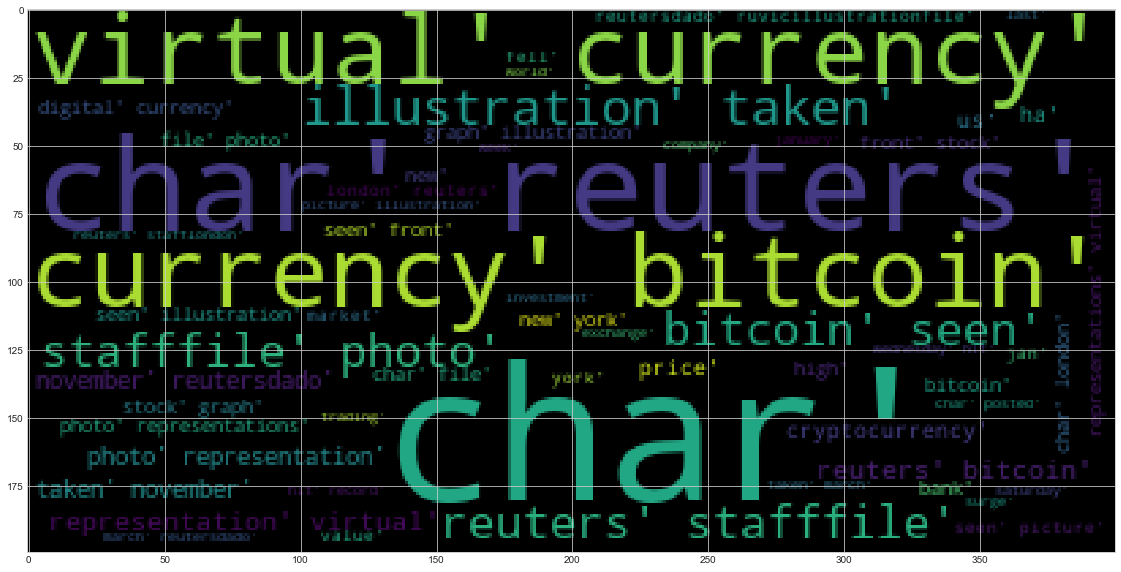

In [23]:
# Generate the Bitcoin word cloud
btc_wc = bitcoin_df['tokens'].astype(str)
b_wc = WordCloud().generate(' '.join(btc_wc))
plt.imshow(b_wc)

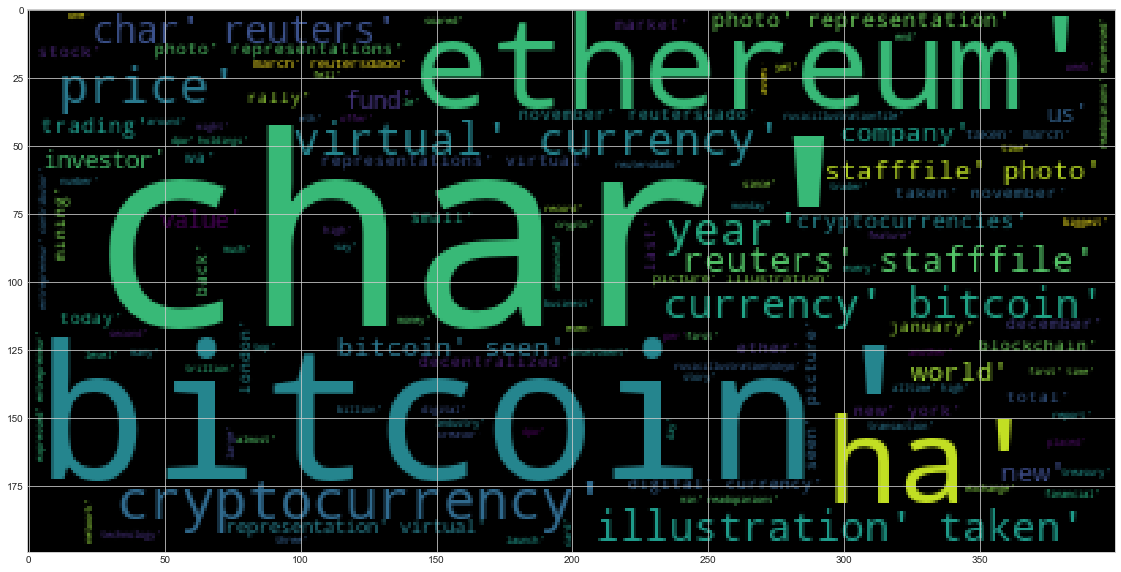

In [24]:
# Generate the Ethereum word cloud
eth_wc = ethereum_df['tokens'].astype(str)
e_wc = WordCloud().generate(' '.join(eth_wc))
plt.imshow(e_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

ERROR: Error while checking for conflicts. Please file an issue on pip's issue tracker: https://github.com/pypa/pip/issues/new
Traceback (most recent call last):
  File "/Users/jessicarosedecunhacarmichael/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/Users/jessicarosedecunhacarmichael/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jessicarosedecunhacarmichael/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/Users/jessicarosedecunhacarmichael/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pip/_vendor/pkg_resourc

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
all_btc_text = bitcoin_df['text'].str.cat()
all_btc_text[:1000]

'The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. Its not clear whether the proposed goods and services tax (GST) would… [+1397 chars]Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocurrency passed $33,000 in value, according to CoinDesk, before dip… [+2123 chars]When Mt. Gox went bankrupt in 2014, it was the world’s largest Bitcoin exchange, holding 850,000 Bitcoins from thousands of users. Now, creditors might finally be able to get a portion of those riche… [+626 chars]Ban reflects Twitters failure to promote healthy conversation\r\nPhoto by Hannah McKay-Pool/Getty Images\r\nTwitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Don… [+3185 chars]New York (CNN Business)Bitcoin has been flirting with the $30,000 mark for weeks, and finally passed that record-setting level Saturday. The

In [29]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "BTC NER WORD CLOUD"

In [30]:
# Render the visualization
displacy.render(doc, style='ent')

In [31]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['India', '18%', 'bitcoin', 'the Times of India', '20,000', 'Bitcoin', 'Saturday', '33,000', 'CoinDesk', 'Mt. Gox', '2014', 'Bitcoin', '850,000', 'Bitcoins', 'thousands', 'Twitters', 'Hannah McKay-Pool/Getty', 'Twitter', 'Jack Dorsey', 'Tweets', 'US', 'Don', 'CNN', '$30,000 mark', 'weeks', 'Saturday', 'above $33,000', 'Gemini', 'Blockrize', 'today', 'Blockrizes', 'Later this year', 'Joe Bidens', 'the U.S. Treasury Department', 'Michael S. Barr', 'bitcoin', 'the popular cryptocurrency exchange', 'Sunday', 'Bitcoin', '50%', 'the previous month', 'the week', '24.8%', 'Bitcoin', '12th', 'Forbes', 'Reuters', 'LONDON', 'Dec 30', 'Reuters', 'Bitcoin', 'Wednesday', 'a record $28,599.99', 'this year', '295%', '3.5%', '28,349', 'Alex Castro', 'The Verge', 'Jack Dorsey', 'Twitter and Square', 'Reuters', 'LONDON', 'Jan 4', 'Reuters', 'Bitcoin', '14%', '27,805', 'Monday', 'the new year', 'Bitcoin', '33,365', 'Asia', 'Monday', '34,800', 'Sunday', 'Bitcoin', '33,365', 'Asia', 'Monday', '34,800', 'Sun

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
all_eth_text = ethereum_df['text'].str.cat()
all_eth_text[:1000]

'Cryptocurrencies stole headlines on the first stock-market trading day of 2021, with bitcoin and ethereum selling off steeply after blistering run-ups over the weekend.\r\nBut investors need not worry … [+2877 chars]Ethereum creator Vitalik Buterin.\r\n14 with 11 posters participating\r\nEther, the native currency of the Ethereum network and the second most valuable cryptocurrency, has soared above $1,000 for the fi… [+3015 chars]Bitcoin fizzled in Monday trading as the famously volatile cryptocurrency pulled back after a spectacular new-year rally.\r\nPrices fell as much as 17 per cent in the biggest drop since March before re… [+2174 chars]By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nTOKYO (Reuters) - Bitcoin fell more t… [+293 chars]By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency bitcoin is seen in this illustration taken November 19, 2020. R

In [33]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "ETHEREUM NER WORD CLOUD"

In [34]:
# Render the visualization
displacy.render(doc, style='ent')

In [35]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['first', 'day of 2021', 'bitcoin', 'the weekend', 'Vitalik Buterin', '14', '11', 'Ethereum', 'second', 'above $1,000', 'Monday', 'new-year', 'as much as 17', 'March', 'Reuters', 'November 19, 2020', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'Reuters', 'November 19, 2020', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'Reuters', 'Bitcoin', 'January 7, 2021', 'REUTERS', 'Dado Ruvic', 'SIN', 'Reuters', 'Bitcoin', 'January 7, 2021', 'REUTERS', 'Dado Ruvic', 'SIN', '2020', 'Las Vegas', 'dozens', '3080', 'Reuters', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'second', 'December 2020', 'first', 'Ethereum 2.0', '9, 2021', '7 min', '2020', 'the year', 'Reuters', 'Bitcoin', 'Wednesday', 'a record $28,599.99', 'digital', 'this year', 'YORK', 'Reuters', 'U.S.', 'the years', 'U.S.', 'chars]1', '1', 'more than $1 trillion', 'bitcoin', 'Bitcoin', 'Reuters', 'Bitcoin', 'March 13, 2020', 'Dado Ruvic', 'LONDON', 'Reuters', 'Reuters', 'Bitcoin', 'March 13, 2020', 'REUTE

---